\newpage

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
# import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics


C:\Users\melin\AppData\Local\Temp\ipykernel_17396\3576789230.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Question 1
(1)

Using the Wine Quality dataset from Kaggle, https://www.kaggle.com/datasets/rajyellow46/wine-quality, we can perform the following.

(2)

In [2]:
# Importing data
df = pd.read_csv('WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [3]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

(3) 

Based on this initial exploration, we can see that: 

* The dataset has 1143 entries with a unique ID. 
* The dataset is composed of continuous variables.

(4)

In [4]:
# 1.4 
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


* Data of different columns are all of different scales, will need to be normalized before performing any type of classification on it. 
* pH and density appear to have the lowest variance in values (based on standard dev and difference between mean and max)

(5)

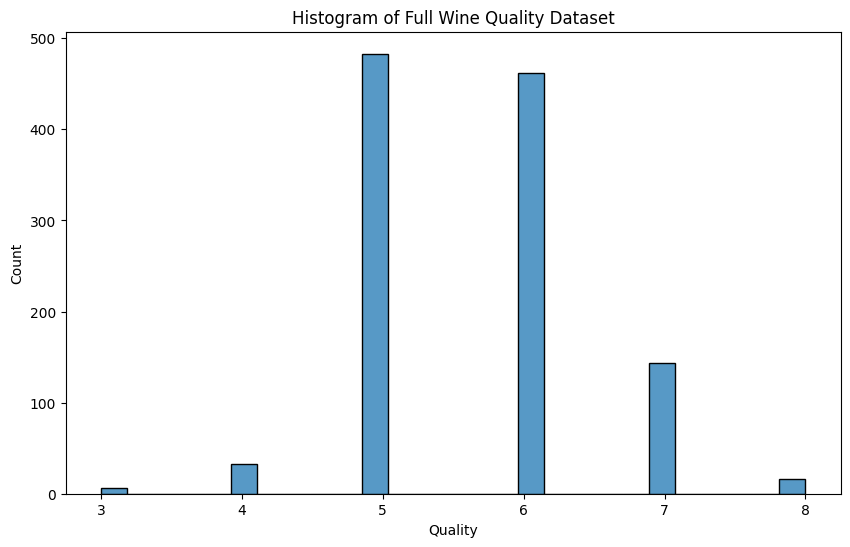

In [5]:
# 1.5 - Visualizing  wine quality distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['quality'], kde=False)
plt.title('Histogram of Full Wine Quality Dataset')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

Most of the observations are within the range 5-7, with no wine's being rated lower than 3.

(6)

In [6]:
# Taking subset of quality scores >4 and <8
subs_df = df[df['quality'].isin([5, 6, 7])]

(7)

In [7]:
print('There are', subs_df.shape[0], 'observations in the subset')
print('There are', subs_df['quality'].nunique(), 'unique quality scores.')

There are 1088 observations in the subset
There are 3 unique quality scores.


(8)

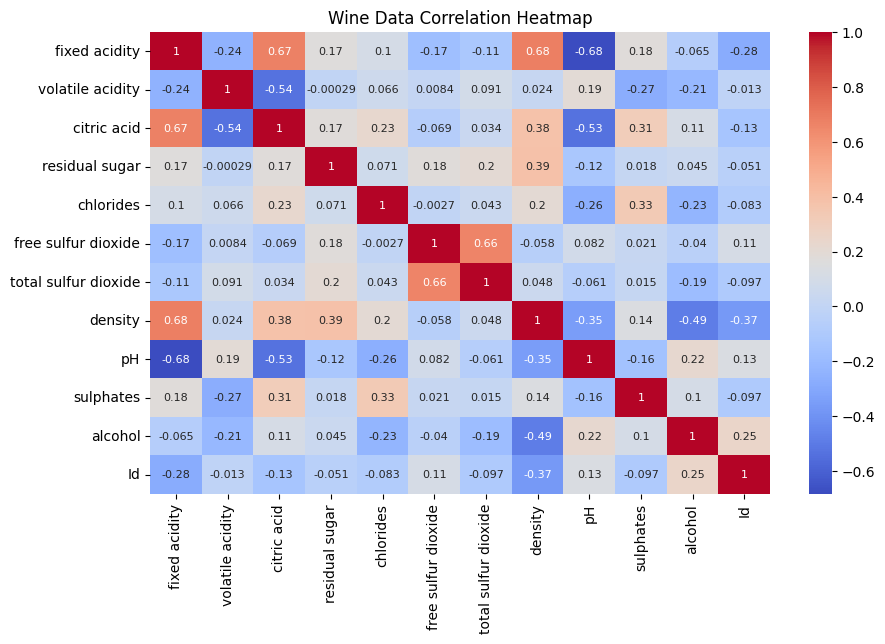

In [8]:
# Creating correlation heatmap
no_qual_df = subs_df.drop(['quality'], axis=1)

plt.figure(figsize=(10, 6))
sns.heatmap(no_qual_df.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 8})  # Adjust the font size
plt.title('Wine Data Correlation Heatmap')
plt.show()

* The highest positive correlation between two different variables is between density and fixed acidity (0.68). 
* The highest negative correlation between two different variables is fixed acidity and pH (-0.68).
* There is almost no correlation between voltaile acidity and residual sugar (-294 u)
* Most variables are not correlated, with most falling in the [-0.2, 0.2] range

(9)

In [9]:
subs_df.dropna(inplace=True)
print('There are', subs_df.shape[0], 'observations in the subset after the missing rows have been dropped.')
print('Since all original values are present, there were no missing values in the dataset')

There are 1088 observations in the subset after the missing rows have been dropped.
Since all original values are present, there were no missing values in the dataset


(10/11)

In [10]:
# Taking predictor, response variable subsets
x = subs_df.drop(['quality'], axis=1)
y = subs_df['quality']

# Scaling predictor variables
x = scale(x, axis=0)

# Taking training/testing set (75%/25%)
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y, 
    test_size=0.25, 
    random_state=0, 
    stratify=y
    )

Since KNN measures the distance between points to find an observation's neighbors, the distance of each variable must be normalized so no one variable skews the distance measurement. For example, if there were two sets of predictor variables where one is in the [50-100] range, and the other is in the [1e-4, 2e-4] range, the first predictor would dominate the KNN analysis. To ensure both variables contribute equally, scaling is essential.

(12/13)

In [11]:
# Performing KNN classification, K=5
knn = neighbors.KNeighborsClassifier(
    n_neighbors = 5,
    algorithm='brute'
    )

# Training model and making predictions
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

(14)

In [12]:
print('The accuracy of the model is', round(metrics.accuracy_score(y_test, pred),2)*100, '%')

The accuracy of the model is 59.0 %


This model performance is not good, as it is only marginally better than flipping a coin and guessing the quality score.

(15)

[[83 34  4]
 [40 61 14]
 [ 4 15 17]]


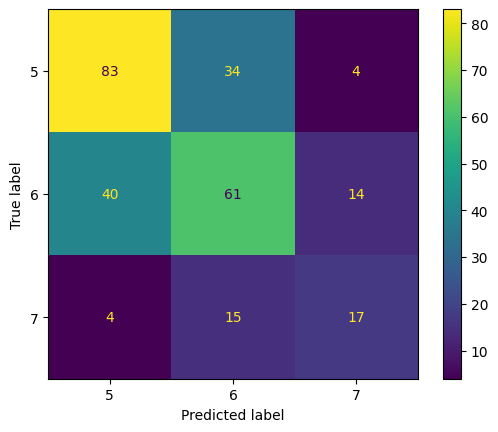

In [13]:
# Generating confusion matrix
cm = metrics.confusion_matrix(y_test, pred)
print(cm)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                      display_labels=['5', '6', '7'])
disp.plot()

Looking at the confusion matrix (and the easier to visualize ConfusionMatrixDisplay) we can interpret the rows as the true response variables, and the columns as the predicted response variables. So for example, looking at the diagonal we can see how many entries were predicted correctly. Looking in the top left shows that 83 entries were predicted as 5, and are actually 5. 

Looking at the entry in row 2 col 1, we can see that 40 entries that were predicted to be a quality of 5 are actually a quality of 6.

(16) 

This matrix shows that the algorithm struggles to accurately predict entries with a quality = 7 and 6. We know this because of the 36 entries that are actually 7, only 17 were predicted correctly (47%). Likewise, only 53% of quality 6 wines were predicted correctly. Quality 5 wines have the highest accuracy, with a rate of 69%.

It may be valuable to look into some characteristics of quality 7 and 6 wine, to understand what the model is missing when classifying the test set. 

(17/18)

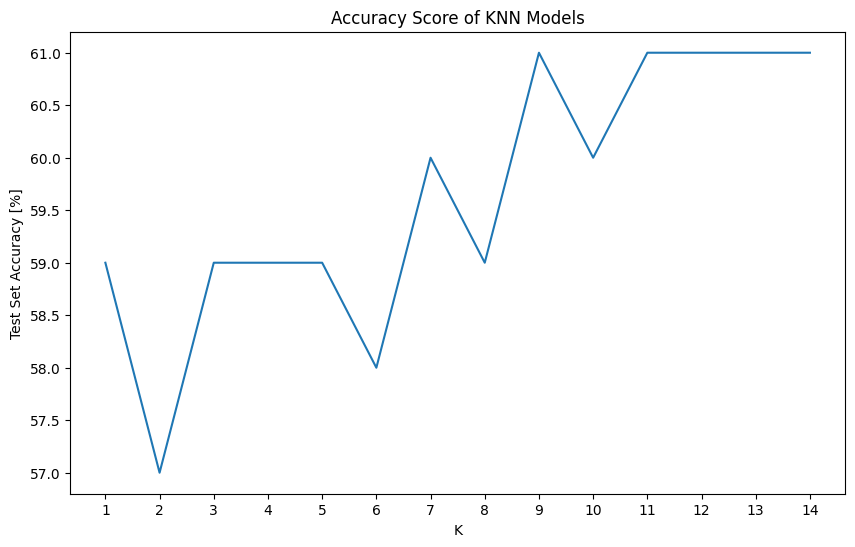

In [14]:
# Testing K values
k_range = range(1, 15)
score_acc = [] 

for k in k_range:

    knn = neighbors.KNeighborsClassifier(
    n_neighbors = k,
    algorithm='brute'
    )
    # train the model
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    acc = round(metrics.accuracy_score(y_test, y_pred),2)*100
    score_acc.append(acc)

# Plotting accuracy vs K values
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_range, y=score_acc)
plt.title('Accuracy Score of KNN Models')
plt.xlabel('K')
plt.ylabel('Test Set Accuracy [%]')
plt.xticks(range(1, 15))
plt.show()

(19)

The best K value is 9. This maximizes the accuracy (61%) while minimizing the size of K.

(20)

Although K=9 leads to the best result, the accuracy is still not great. An accuracy of 61% leaves much room for improvement. This is likely because the predictor values are so varied. This makes it difficult for KNN to accurately predict quality using the predictors.

(21)

* Find the predictor variables with a high correlation to the quality (either positive or negative) and then use those variables to perform KNN.
* This data may be suffering from the curse of dimensionality. In which case, methods to reduce dimensionality like PCA may be beneficial as a preprocessing step. Once the relationship between different predictor variables is found, (i.e. latent variables), these variables can be used in KNN.